<a href="https://colab.research.google.com/github/ilanb1/DSP-IP/blob/main/hands_on_Mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

load Mnist dataset:

In [1]:
from keras.datasets import mnist

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Show each digit from 0 to 9 :

In [3]:
import numpy as np
import matplotlib.pyplot as plt

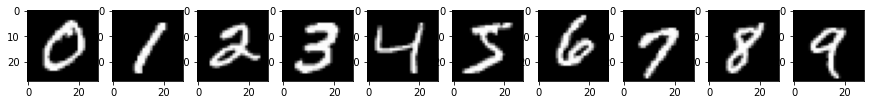

In [4]:
fig, arr = plt.subplots(1, 10, figsize=(15, 15))

for digit in range(10):
  image_index = np.where(train_y == digit)[0][0]
  image = train_X[image_index]
  arr[digit].imshow(image, cmap="gray")


randomly select and display 20 numbers from the range [0, 100] in three digit format
(for example: 1 –&gt; 001, 10 –&gt; 010), add title with the number.

In [5]:
import random

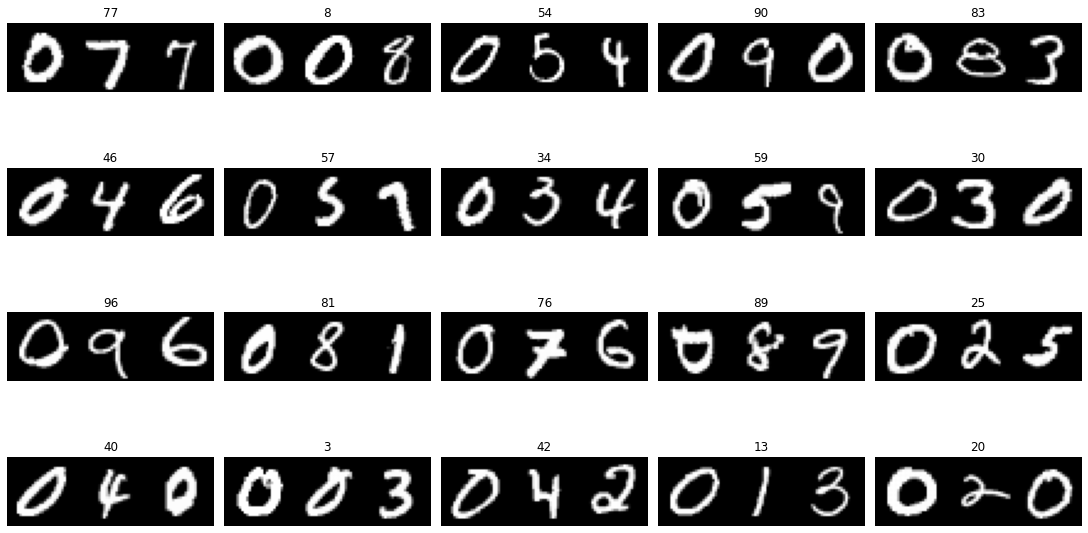

In [7]:
selected_numbers = random.sample(range(101), 20)

def generate_image(num):
  new_format = f"{num:03}" #this is the three digit format
  digits_list=[]
  for digit in new_format:
    digit_index = random.choice(np.where(train_y==int(digit))[0])
    digits_list.append(train_X[digit_index])  
  image = np.hstack(digits_list)
  return image


fig, ax = plt.subplots(4, 5,constrained_layout=True, figsize=(15,8))

for index, number in enumerate(selected_numbers):
  image = generate_image(number)
  ax[index//5 , index%5].imshow(image, cmap="gray")
  ax[index//5 , index%5].set_title(number)
  ax[index//5 , index%5].axis("off")


Existing several ways of detecting contours in an image, select two
algorithms/techniques and apply them to 3 digits number(tip: don&#39;t repeat three-
time, generate three digits number to work on)




In [8]:
import cv2

Text(0.5, 1.0, 'contours on the thresholded image')

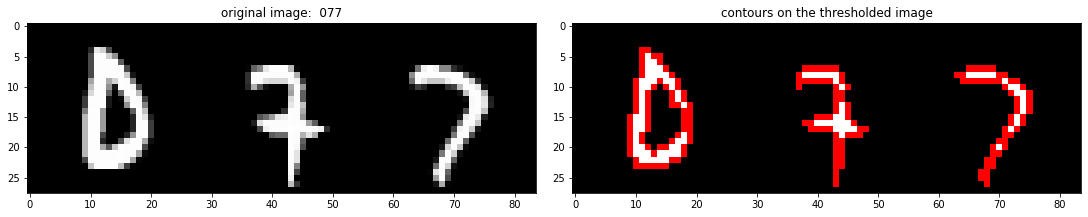

In [9]:
number = random.choice(selected_numbers)
image = generate_image(number)

ret, thresh = cv2.threshold(image, 127, 255, 0)

# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# draw all contours on the image
final = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)
cv2.drawContours(final, contours, -1, (255, 0, 0), 1)

fig, arr = plt.subplots(1, 2,constrained_layout=True, figsize=(15,15))
arr[0].imshow(image, cmap="gray")
arr[0].set_title(f"original image:  {number:03}")
arr[1].imshow(final)
arr[1].set_title("contours on the thresholded image")



It doesn't look so good, lets try to resize the image so we will see the contours exactly on the edges 

Text(0.5, 1.0, 'contours on the thresholded image')

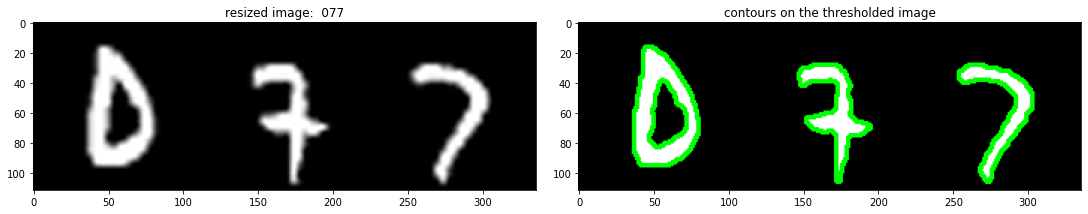

In [10]:
dim = (28*4*3 , 28*4)
resized = cv2.resize(image, dim, interpolation=cv2.INTER_CUBIC)

ret, thresh = cv2.threshold(resized, 127, 255, 0)

# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# draw all contours on the image
final = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)
cv2.drawContours(final, contours, -1, (0, 255, 0), 2) #we can now afford thicker contour

fig, arr = plt.subplots(1, 2,constrained_layout=True, figsize=(15,15))
arr[0].imshow(resized, cmap="gray")
arr[0].set_title(f"resized image:  {number:03}")
arr[1].imshow(final)
arr[1].set_title("contours on the thresholded image")